## **I. PREPARING TRAINING DATA**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm as tq

  0%|          | 0/25 [00:00<?, ?it/s]

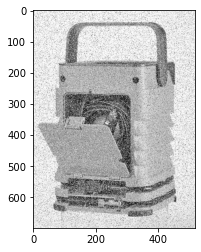

  0%|          | 0/25 [00:00<?, ?it/s]


In [2]:
import pandas as pd
from os import walk

directory = 'augmented'
_, dirs, _ = next(walk(directory))
categories = dirs

# convert the images to grayscale
for category in tq(categories):
    path = os.path.join(directory, category) # path to category images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
import pandas as pd
from os import walk

directory = 'augmented'
_, dirs, _ = next(walk(directory))
categories = dirs

IMG_SIZE = 256
training_data = []

import time
start = time.time()
def create_training_data():
    for category in tq(categories):
        print('category: ', category)
        path = os.path.join(directory, category) # path to category images
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
end = time.time()
print(end-start)

  0%|          | 0/25 [00:00<?, ?it/s]

category:  AIR COMPRESSORS


  4%|▍         | 1/25 [00:03<01:28,  3.67s/it]

category:  ALL GENERATORS


  8%|▊         | 2/25 [00:07<01:23,  3.65s/it]

category:  BATHROOM LIGHTS


 12%|█▏        | 3/25 [00:10<01:11,  3.24s/it]

category:  CAULK


 16%|█▌        | 4/25 [00:11<00:57,  2.71s/it]

category:  CAULKING GUNS


 20%|██        | 5/25 [00:18<01:19,  3.98s/it]

category:  CUTTING AND GRINDING ACCESSORIES


 24%|██▍       | 6/25 [00:22<01:20,  4.21s/it]

category:  DESK LAMPS


 28%|██▊       | 7/25 [00:26<01:11,  3.96s/it]

category:  DRILLS AND DRIVERS


 32%|███▏      | 8/25 [00:28<00:59,  3.52s/it]

category:  ELECTRICAL PLUGS CONNECTORS AND TIMERS


 36%|███▌      | 9/25 [00:31<00:53,  3.32s/it]

category:  EXTENSION LADDERS


 40%|████      | 10/25 [00:38<01:03,  4.26s/it]

category:  EYE PROTECTION


 44%|████▍     | 11/25 [00:42<00:58,  4.15s/it]

category:  FLAGGING TAPE


 48%|████▊     | 12/25 [00:44<00:48,  3.70s/it]

category:  FLUSHMOUNTS


 52%|█████▏    | 13/25 [00:47<00:42,  3.54s/it]

category:  GARAGE STORAGE CABINETS


 56%|█████▌    | 14/25 [00:51<00:39,  3.60s/it]

category:  GRINDERS


 60%|██████    | 15/25 [00:55<00:37,  3.74s/it]

category:  HAMMERS AND SLEDGES


 64%|██████▍   | 16/25 [01:01<00:38,  4.24s/it]

category:  HARD HATS


 68%|██████▊   | 17/25 [01:08<00:41,  5.24s/it]

category:  LEVELS


 72%|███████▏  | 18/25 [01:11<00:32,  4.65s/it]

category:  LIGHT BULBS


 76%|███████▌  | 19/25 [01:14<00:23,  3.89s/it]

category:  PLIERS


 80%|████████  | 20/25 [01:16<00:17,  3.42s/it]

category:  SCREW DRIVERS AND NUT DRIVERS


 84%|████████▍ | 21/25 [01:19<00:13,  3.33s/it]

category:  TAPE MEASURES


 88%|████████▊ | 22/25 [01:24<00:11,  3.76s/it]

category:  TOOL BAGS AND BOXES


 92%|█████████▏| 23/25 [01:26<00:06,  3.26s/it]

category:  WORK GLOVES


 96%|█████████▌| 24/25 [01:30<00:03,  3.41s/it]

category:  WRENCHES


100%|██████████| 25/25 [01:32<00:00,  3.72s/it]

92.98089146614075


In [4]:
print(len(training_data))

10483


In [5]:
# print(training_data[-1])
IMG_SIZE

256

In [6]:
import random
random.shuffle(training_data)

In [7]:
# Labeling the training data
X = [] #features
y = [] #label

for features, label in tq(training_data):
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

100%|██████████| 10483/10483 [00:00<00:00, 129421.51it/s]


In [8]:
X.shape

(10483, 256, 256, 1)

In [9]:
y.shape

(10483,)

In [10]:
import pickle

with open("X_256.pickle", "wb") as X_writing:
    pickle.dump(X, X_writing)

with open("y_256.pickle", "wb") as y_writing:
    pickle.dump(y, y_writing)

with open("categories.pickle", "wb") as categories_writing:
    pickle.dump(categories, categories_writing)